# Hoja de trabajo

## Análisis Exploratorio

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [104]:
# importar los datos de csv a un dataframe

df_red = pd.read_csv('winequality-red.csv', delimiter = ';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:
df_white = pd.read_csv('winequality-white.csv', delimiter = ';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [106]:
import numpy as np

def info_columnas(df):
    info_df = pd.DataFrame(columns=['columna', 'tipo_de_dato', 'cantidad_de_valores_nulos', 'cantidad_de_valores_unicos', 'valor_random'])

    for columna in df.columns:
        tipo_de_dato = df[columna].dtype
        cantidad_de_valores_nulos = df[columna].isnull().sum()
        cantidad_de_valores_unicos = df[columna].nunique()
        valor_random = df[columna].sample(1).values[0]

        info_df = info_df._append({'columna': columna, 
                                  'tipo_de_dato': tipo_de_dato, 
                                  'cantidad_de_valores_nulos': cantidad_de_valores_nulos, 
                                  'cantidad_de_valores_unicos': cantidad_de_valores_unicos,
                                  'valor_random': valor_random}, 
                                 ignore_index=True)
    return info_df

In [107]:
info_columnas(df_red)

,columna,tipo_de_dato,cantidad_de_valores_nulos,cantidad_de_valores_unicos,valor_random
0,fixed acidity,float64,0,96,6.90000
1,volatile acidity,float64,0,143,0.36000
2,citric acid,float64,0,80,0.48000
3,residual sugar,float64,0,91,1.60000
4,chlorides,float64,0,153,0.06700
5,free sulfur dioxide,float64,0,60,34.00000
6,total sulfur dioxide,float64,0,144,61.00000
7,density,float64,0,436,0.99553
8,pH,float64,0,89,3.52000
9,sulphates,float64,0,96,0.84000


In [108]:
info_columnas(df_white)

,columna,tipo_de_dato,cantidad_de_valores_nulos,cantidad_de_valores_unicos,valor_random
0,fixed acidity,float64,0,68,7.3000
1,volatile acidity,float64,0,125,0.2300
2,citric acid,float64,0,87,0.2200
3,residual sugar,float64,0,310,4.6000
4,chlorides,float64,0,160,0.0450
5,free sulfur dioxide,float64,0,132,35.0000
6,total sulfur dioxide,float64,0,251,209.0000
7,density,float64,0,890,0.9967
8,pH,float64,0,103,3.0700
9,sulphates,float64,0,79,0.4000


### Análisis

Podemos concluir que en un primer vistazo, los datos de ambos csv son iguales y se puede agrupar en un solo conjunto de datos. Sin embargo, se añadirá una columna categorica que indique si es "red" o "white" en forma de booleano. 

In [109]:
# añadir una columna llamada tipo a cada dataframe. Para df_red, el valor de la columna sera 1 y para df_white sera 0.
df_red['tipo'] = 1
df_white['tipo'] = 0

In [110]:
# unir ambos dataframes en uno solo
df = pd.concat([df_red, df_white], ignore_index=True)
print(df_red.shape, df_white.shape, df.shape)

(1599, 13) (4898, 13) (6497, 13)


## Análisis Exploratorio

### Estadísticas Descriptivas de las variables

In [111]:
# df menos tipo. 
df_stats = df.drop('tipo', axis=1).describe().T
df_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [112]:
# Funcion para encontrar la distribucion de las variables
def distribucion_variable(df, variable):
    plt.figure(figsize=(10,6))
    if df[variable].dtype == 'int64' or df[variable].dtype == 'float64':
        sns.distplot(df[variable], kde=False, color='blue')
    else:
        sns.countplot(df[variable], color='blue')
    plt.title(f'Distribucion de la variable {variable}')
    plt.show()

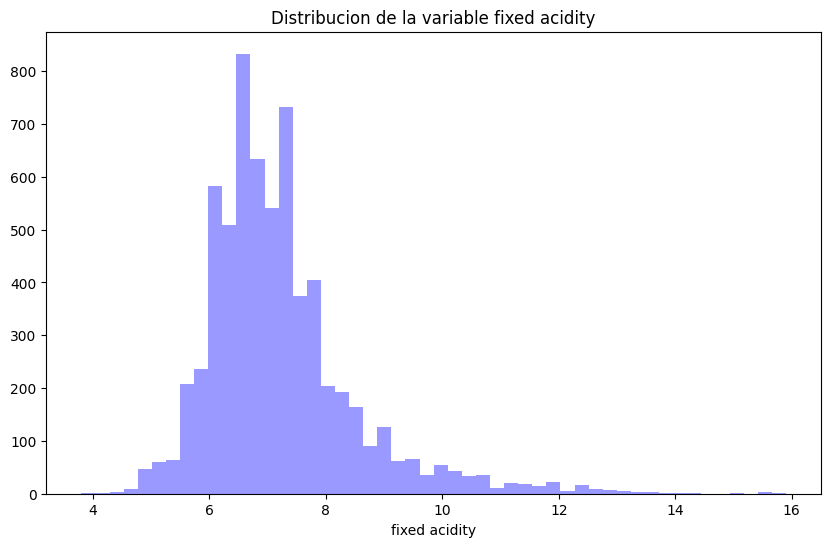

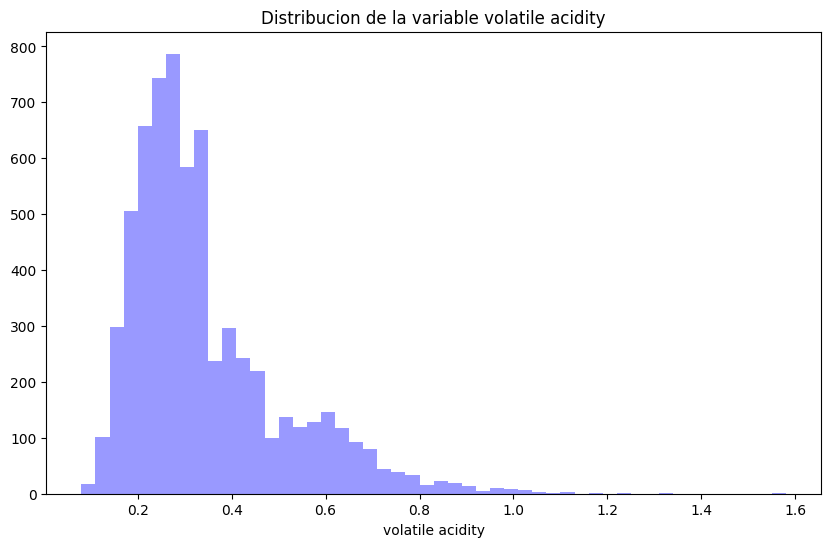

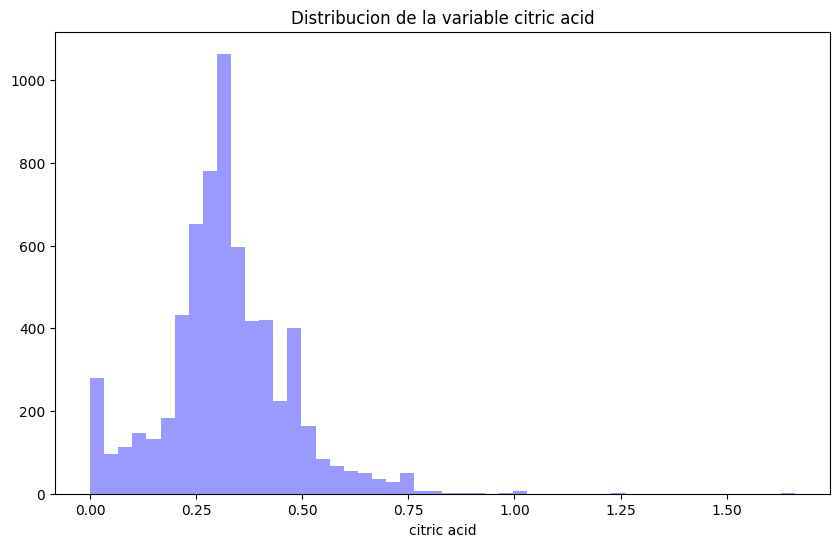

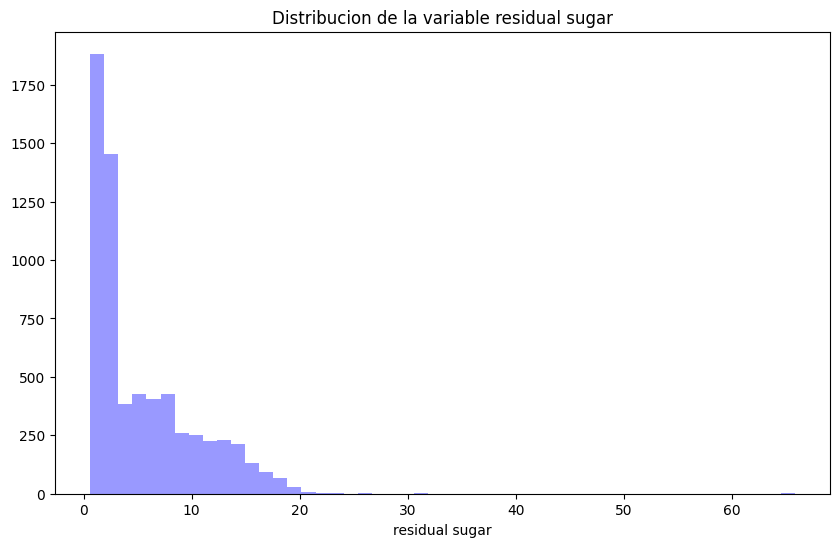

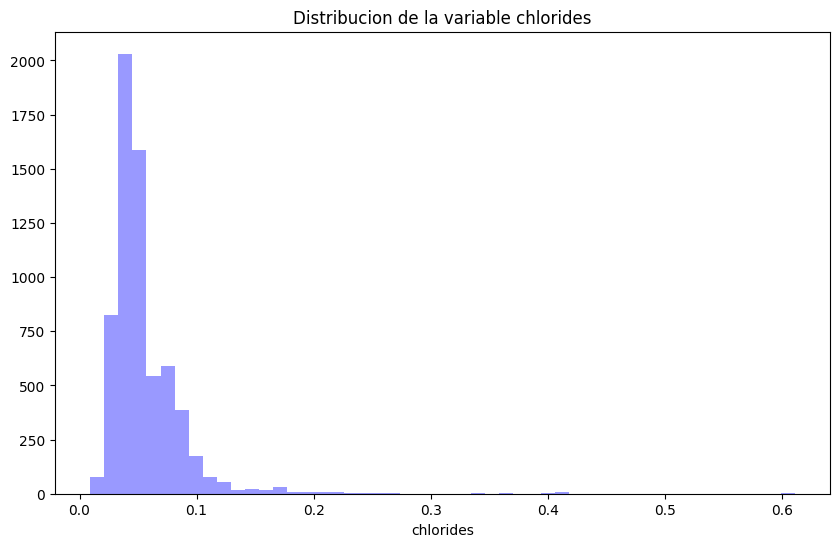

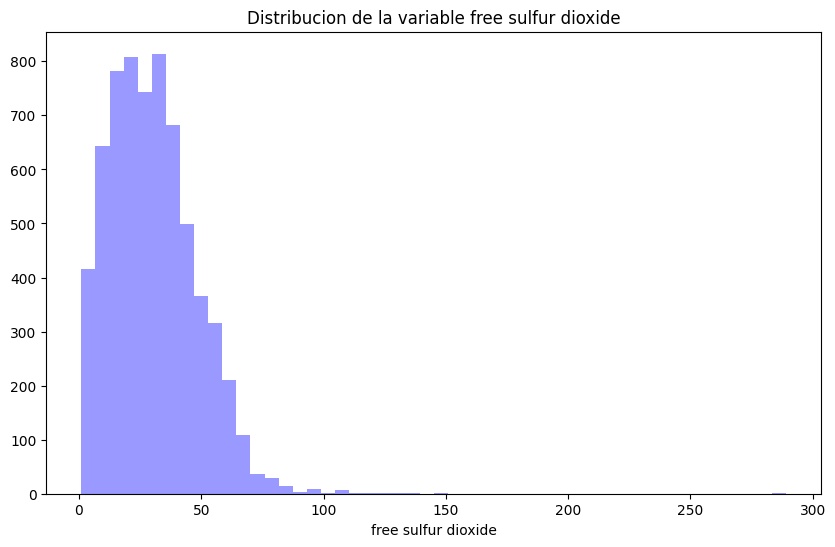

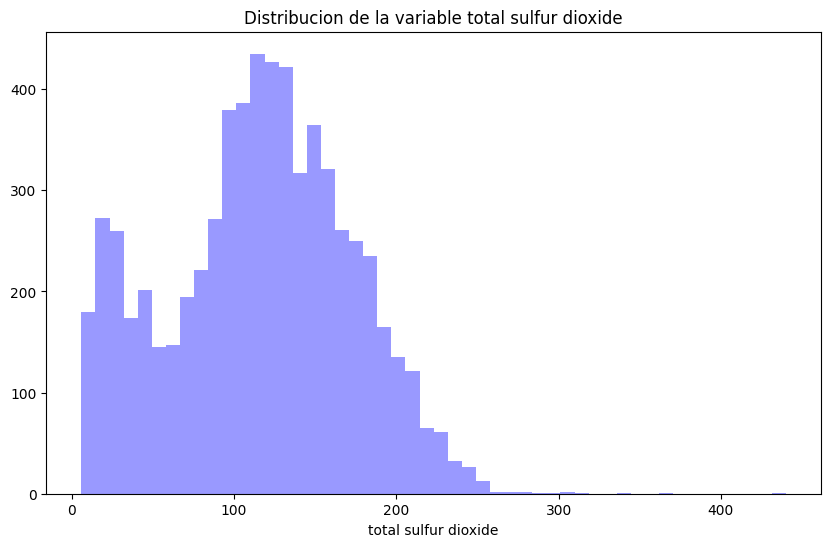

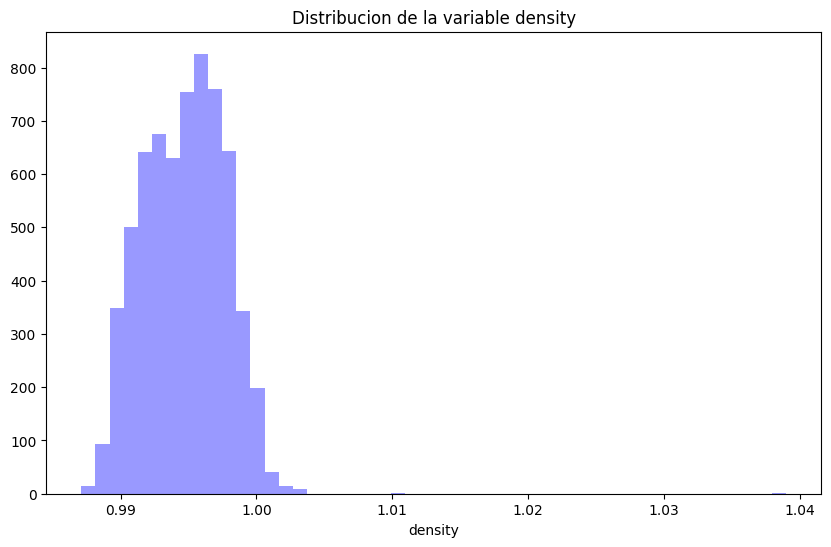

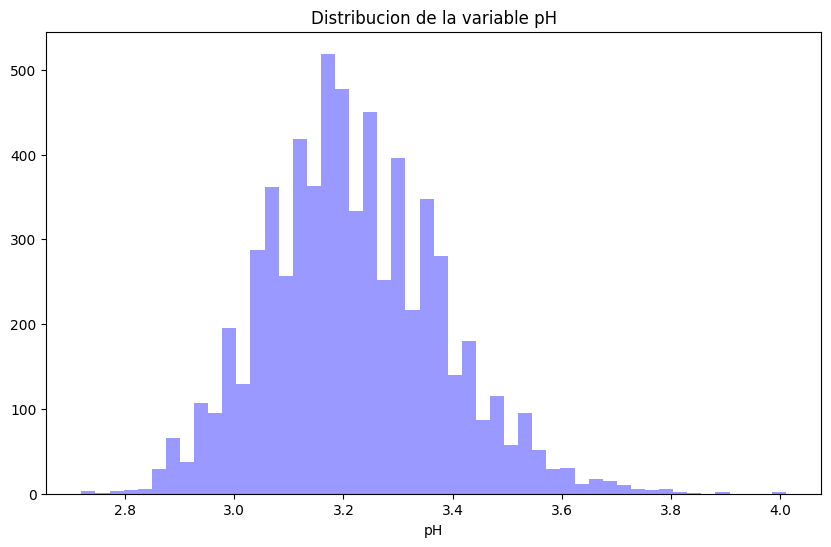

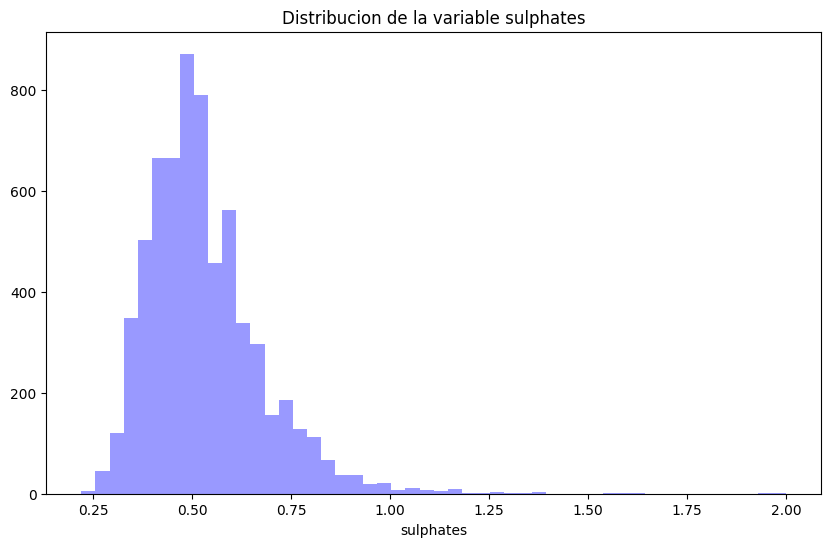

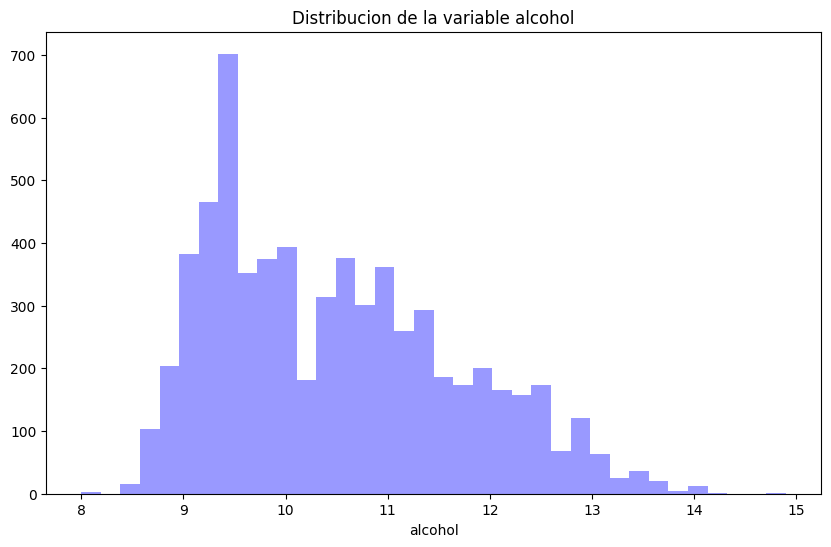

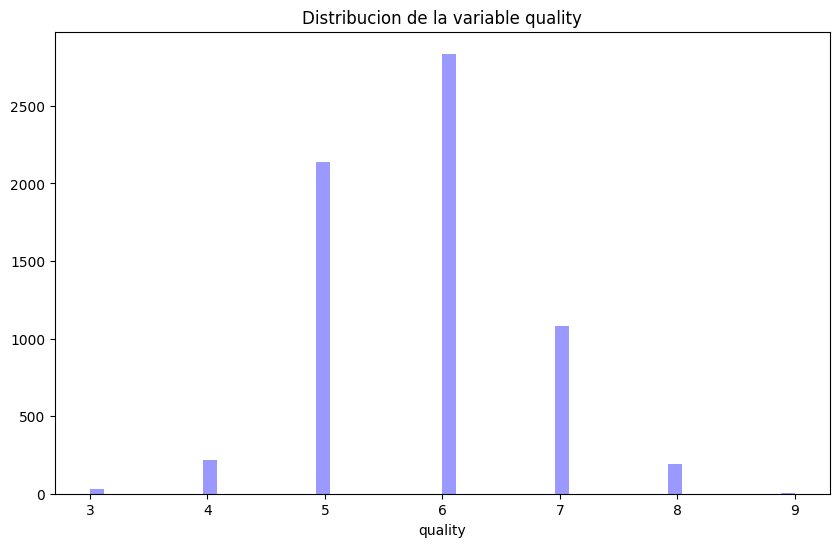

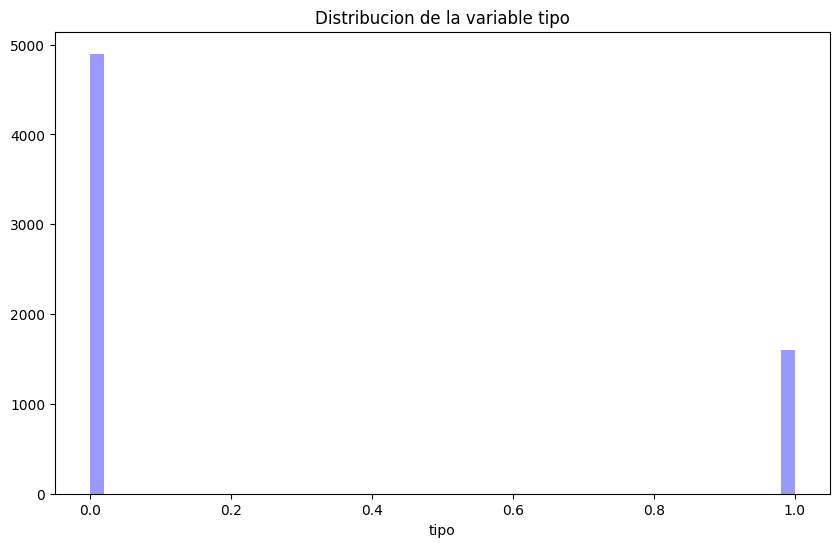

In [113]:
lista_columnas = df.columns
for columna in lista_columnas:
    distribucion_variable(df, columna)

### Preprocesamiento de datos

In [114]:
# Limpieza de datos y preprocesamiento
info_columnas(df)

,columna,tipo_de_dato,cantidad_de_valores_nulos,cantidad_de_valores_unicos,valor_random
0,fixed acidity,float64,0,106,8.20000
1,volatile acidity,float64,0,187,0.36000
2,citric acid,float64,0,89,0.29000
3,residual sugar,float64,0,316,2.90000
4,chlorides,float64,0,214,0.03400
5,free sulfur dioxide,float64,0,135,6.00000
6,total sulfur dioxide,float64,0,276,55.00000
7,density,float64,0,998,0.99342
8,pH,float64,0,108,3.37000
9,sulphates,float64,0,111,0.47000


Es posible observar que no es necesario "limpiar" los datos. No hay valores nulos para cada una de las variables. Sin embargo, se observa que es necesario "estandarizar" los valores. 

In [115]:
from sklearn.preprocessing import StandardScaler

def estandarizar_dataframe(df, columna_excluida):
    scaler = StandardScaler()

    # estandarizar todas las columnas, menos la columna excluida
    df_scaled = df.drop(columna_excluida, axis=1)
    df_scaled = scaler.fit_transform(df_scaled)
    df_scaled = pd.DataFrame(df_scaled, columns=df.drop(columna_excluida, axis=1).columns)
    df_scaled[columna_excluida] = df[columna_excluida]
    
    return df_scaled

In [116]:
df_scaled = estandarizar_dataframe(df, 'tipo')
df_red_scaled = estandarizar_dataframe(df_red, 'tipo')
df_white_scaled = estandarizar_dataframe(df_white, 'tipo')

## División del Conjunto de Datos

In [117]:
#Funcion para dividir el conjunto de datos en entrenamiento y prueba utilizando una proporción 80-20.

from sklearn.model_selection import train_test_split

def dividir_entrenamiento_prueba(df, columna_objetivo):
    X = df.drop(columna_objetivo, axis=1)
    y = df[columna_objetivo]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [119]:
red_X_train, red_X_test, red_y_train, red_y_test = dividir_entrenamiento_prueba(df_red_scaled, 'tipo')
white_X_train, white_X_test, white_y_train, white_y_test = dividir_entrenamiento_prueba(df_white_scaled, 'tipo')
X_train, X_test, y_train, y_test = dividir_entrenamiento_prueba(df_scaled, 'tipo')